In [1]:
## VISSIM Modules
import win32com.client as com
import os

## RL Modules
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("ERROR: GPU DEVICE NOT FOUND.")

## Data Management Modules
import pickle

## User Defined Modules
import Simulator_Functions as SF
import Simulator_Functions as SF2

from RLAgents import DQNAgent
from NParser import NetworkParser
from COMServer import COMServerDispatch, COMServerReload
from TupleToList import toList
## Other Modules
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

Default GPU Device: /device:GPU:0


Using TensorFlow backend.


In [2]:
## Network Model Parameters
Random_Seed = 42
model_name  = 'Single_Cross_Straight'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
program = 'DuelingDQN'
reward_type = 'Queues'
state_type  = 'Queues'
## Use of additional files?
flag_read_additionally  = False
## Load trained model?
Demo_Mode = True
load_trained = False
Quickmode = True
SaveResultsAgent = True
# Random demand
Random_Demand = False

In [3]:
## Data handling flags
# Flag for restarting the COM Server
reset_flag = True
#cache_flag = False
# If a fresh start is needed, all previous results from simulations are deleted
Start_Fresh = True
# Debug action
debug_action = False

In [4]:
## RL Hyperparamenters
# Number of simulations
episodes = 100
partial_save_at = 10
# Timesteps per simulation (1 timestep = 0.1 sec)
simulation_length = 36000*1
memory_population_length = simulation_length*5
## State-Action Parameters
state_size = 4
action_size = 5
# Memory Size
memory_size = 5000
# Batch Size
batch_size = 128
# Learning Rate
alpha   = 0.0001
# Discount Factor
gamma   = 0.9
# Exploration Schedule
epsilon_start = 1
epsilon_end   = 0.01
epsilon_decay = (epsilon_end - epsilon_start)/episodes
#epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes+1)) # Geometric decay
# Demand Schedule
demands = [100,200, 400, 600, 800, 1000, 1200]
# Session ID
Session_ID = 'Episodes'+str(episodes)+'_Program'+program

Working Directory set to: C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Loading Model File: Single_Cross_Straight.inpx ...
Load process successful
Simulation length set to 18000.0 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Simulation Object
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                 SETUP COMPLETE                      *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
NetworkParser has succesfully crawled the model network.
Deploying instance of Dueling Double Deep Q Learning Agent(s)
Deployed 1 agent(s) of

Reoading...
Episode: 40/100, Epsilon:0.61, Average reward: -384.25
Prediction for [5000,0,5000,0] is: [[-27982.865 -25854.105 -27252.785 -27491.852 -25600.254]]
Weights copied to target model
Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Model, architecture, weights, optimizer and memory succesfully saved. Succesfully Terminated.
Saved Partial results at the end of episode 40.
Reoading...
Episode: 41/100, Epsilon:0.6, Average reward: -388.76
Prediction for [5000,0,5000,0] is: [[-28329.936 -26294.996 -27635.932 -27870.281 -26147.598]]
Reoading...
Episode: 42/100, Epsilon:0.59, Average reward: -106.29
Prediction for [5000,0,5000,0] is: [[-29268.998 -27141.027 -28418.836 -28809.283 -27355.117]]
Reoading...
Episode: 43/100, Epsilon:0.58, Average reward: -160.29
Prediction for [5000,0,5000,0] is: [[-30244.969 -28177.3   -29253.123 -29554.459 -28195.258]]
Reoading...
Episode: 44/100, Epsilon:0.57, Average reward: -108.57
Prediction for [

Reoading...
Episode: 82/100, Epsilon:0.2, Average reward: -104.84
Prediction for [5000,0,5000,0] is: [[-43394.24  -40715.645 -41255.098 -41238.95  -41569.24 ]]
Reoading...
Episode: 83/100, Epsilon:0.19, Average reward: -74.74
Prediction for [5000,0,5000,0] is: [[-43494.895 -40716.812 -41327.49  -41321.984 -41633.836]]
Reoading...
Episode: 84/100, Epsilon:0.18, Average reward: -102.65
Prediction for [5000,0,5000,0] is: [[-44139.18  -41387.273 -41882.062 -41832.184 -42342.68 ]]
Reoading...
Episode: 85/100, Epsilon:0.17, Average reward: -102.12
Prediction for [5000,0,5000,0] is: [[-44114.637 -41311.05  -41935.203 -41885.184 -42299.664]]
Weights copied to target model
Reoading...
Episode: 86/100, Epsilon:0.16, Average reward: -73.79
Prediction for [5000,0,5000,0] is: [[-44161.15  -41516.227 -42018.977 -42170.6   -42284.098]]
Reoading...
Episode: 87/100, Epsilon:0.15, Average reward: -56.76
Prediction for [5000,0,5000,0] is: [[-45034.45  -42275.36  -42771.207 -42872.492 -43136.965]]
Reoadin

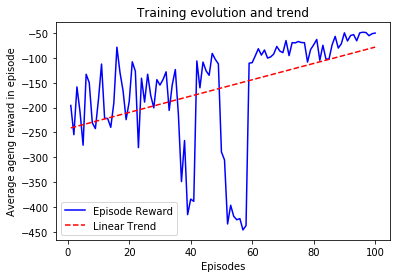

In [5]:
if __name__ == "__main__":
    # Initialize storage
    reward_storage = []
    
    # If previous agents aren't to be loaded, proceed to memory population
    if not load_trained:
        # Initialize simulation
        if 'Vissim' not in globals() or Vissim == None:
            Vissim, Simulation, Network, cache_flag = COMServerDispatch(model_name, vissim_working_directory,\
                                                                        memory_population_length, Start_Fresh, reset_flag = True)
        else:
            Vissim = com.Dispatch("Vissim.Vissim")
            Simulation, Network = COMServerReload(Vissim, model_name, vissim_working_directory,\
                                                  memory_population_length, Start_Fresh, reset_flag = True)
        
    # Setting Random Seed
    Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)
    print ('Random seed set in simulator. Random Seed = '+str(Random_Seed))

    # Deploy Network Parser (crawl network)
    npa = NetworkParser(Vissim)
    print('NetworkParser has succesfully crawled the model network.')
    
    # Initialize agents
    if program == "DQN":
        Agents = [DQNAgent(state_size, action_size, ID, state_type, npa, memory_size, gamma, 0 if Demo_Mode else epsilon_start,\
                           epsilon_end, epsilon_decay, alpha, Vissim, DoubleDQN = False, Dueling = False) for ID in npa.signal_controllers_ids] 
        agents_deployed = True
    elif program == "DDQN":
        Agents = [DQNAgent(state_size, action_size, ID, state_type, npa, memory_size, gamma, 0 if Demo_Mode else epsilon_start,\
                           epsilon_end, epsilon_decay, alpha, Vissim, DoubleDQN = True, Dueling = False) for ID in npa.signal_controllers_ids] 
        agents_deployed = True
    elif program == "DuelingDQN":
        Agents = [DQNAgent(state_size, action_size, ID, state_type, npa, memory_size, gamma, 0 if Demo_Mode else epsilon_start,\
                           epsilon_end, epsilon_decay, alpha, Vissim, DoubleDQN = True, Dueling = True) for ID in npa.signal_controllers_ids] 
        agents_deployed = True
    else:
        print("Incorrect Agent Class selected. Deployment could not be completed.")
        quit()
    
    if agents_deployed:
        print("Deployed {} agent(s) of the Class {}.".format(len(Agents), program))
    
    if Demo_Mode:
        Agents = SF.load_agents(vissim_working_directory, model_name, Agents, Session_ID)
        SF.run_simulation_episode(Agents, Vissim, state_type, state_size, memory_population_length)
        Vissim = None
    # Load previous trained data
    elif load_trained:
        Agents = SF.load_agents(vissim_working_directory, model_name, Agents, Session_ID)
    # If previous data isn't to be loaded, have an initial longer random run to populate memory
    else:
        print('Populating memory with Random Actions....')
        SF.Set_Quickmode(Vissim)
        SF.run_simulation_episode(Agents, Vissim, state_type, state_size, memory_population_length)
    
    # Iterations of the simulation
    for episode in range(episodes):
        if episode != 0:
            # If not the first episode, reset state at the start
            Simulation, Network = COMServerReload(Vissim, model_name, vissim_working_directory,\
                                                simulation_length, Start_Fresh, reset_flag = False)
        npa = NetworkParser(Vissim) 
        for index, agent in enumerate(Agents):
            agent.update_IDS(npa.signal_controllers_ids[index], npa)
            agent.episode_reward = []
        
        # Change demand for every episode
        if Random_Demand:
            for vehicle_input in range(1,5):
                Vissim.Net.VehicleInputs.ItemByKey(vehicle_input).SetAttValue('Volume(1)', demands[np.random.randint(0,6)])
        
        # Use max speed for Simulator
        if Quickmode:
            SF.Set_Quickmode(Vissim)           
        
        # Run Episode
        SF.run_simulation_episode(Agents, Vissim, state_type, state_size, simulation_length)
        
        # Calculate episode average reward
        reward_storage, average_reward = SF.average_reward(reward_storage, Agents, episode, episodes)
        
        # Train agent with experience of episode (indicated batch size)
        for agent in Agents:
            agent.replay(batch_size, episode)
        # Security save for long trainings
        if SaveResultsAgent:
            if (episode+1)%partial_save_at == 0:
                SF.save_agents(vissim_working_directory, model_name, Agents, Session_ID)
                print('Saved Partial results at the end of episode {}.'.format(episode+1))

    #Saving agents memory, weights and optimizer
    if SaveResultsAgent:
        SF.save_agents(vissim_working_directory, model_name, Agents, Session_ID)
    
    # Plotting training progress
    x_series = range(1,len(reward_storage)+1)
    fit = np.polyfit(x_series,reward_storage,1)
    fit_fn = np.poly1d(fit) 
    plt.plot(x_series,reward_storage, '-b', x_series, fit_fn(x_series), '--r')
    plt.xlabel('Episodes')
    plt.ylabel('Average ageng reward in episode')
    plt.title('Training evolution and trend')
    plt.gca().legend(('Episode Reward','Linear Trend'))
    plt.show()
    
    # Close Vissim
    Vissim = None

In [6]:
        SF.save_agents(vissim_working_directory, model_name, Agents, Session_ID)


Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Model, architecture, weights, optimizer and memory succesfully saved. Succesfully Terminated.


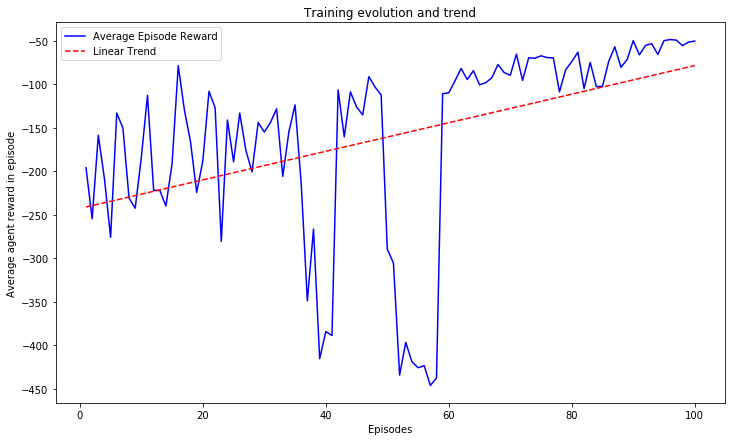

In [11]:
  # Plotting training progress
    plt.figure(figsize=(12,7))
    x_series = range(1,len(reward_storage)+1)
    fit = np.polyfit(x_series,reward_storage,1)
    fit_fn = np.poly1d(fit) 
    plt.plot(x_series,reward_storage, '-b', x_series, fit_fn(x_series), '--r')
    plt.xlabel('Episodes')
    plt.ylabel('Average agent reward in episode')
    plt.title('Training evolution and trend')
    plt.gca().legend(('Average Episode Reward','Linear Trend'))
    plt.show()

In [14]:
Demo_Mode = True
if __name__ == "__main__":
    # Initialize storage
    reward_storage = []
    
    # If previous agents aren't to be loaded, proceed to memory population
    if not load_trained:
        # Initialize simulation
        if 'Vissim' not in globals() or Vissim == None:
            Vissim, Simulation, Network, cache_flag = COMServerDispatch(model_name, vissim_working_directory,\
                                                                        memory_population_length, Start_Fresh, reset_flag = True)
        else:
            Vissim = com.Dispatch("Vissim.Vissim")
            Simulation, Network = COMServerReload(Vissim, model_name, vissim_working_directory,\
                                                  memory_population_length, Start_Fresh, reset_flag = True)
        
    # Setting Random Seed
    Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)
    print ('Random seed set in simulator. Random Seed = '+str(Random_Seed))

    # Deploy Network Parser (crawl network)
    npa = NetworkParser(Vissim)
    print('NetworkParser has succesfully crawled the model network.')
    
    # Initialize agents
    if program == "DQN":
        Agents = [DQNAgent(state_size, action_size, ID, state_type, npa, memory_size, gamma, 0 if Demo_Mode else epsilon_start,\
                           epsilon_end, epsilon_decay, alpha, Vissim, DoubleDQN = False, Dueling = False) for ID in npa.signal_controllers_ids] 
        agents_deployed = True
    elif program == "DDQN":
        Agents = [DQNAgent(state_size, action_size, ID, state_type, npa, memory_size, gamma, 0 if Demo_Mode else epsilon_start,\
                           epsilon_end, epsilon_decay, alpha, Vissim, DoubleDQN = True, Dueling = False) for ID in npa.signal_controllers_ids] 
        agents_deployed = True
    elif program == "DuelingDQN":
        Agents = [DQNAgent(state_size, action_size, ID, state_type, npa, memory_size, gamma, 0 if Demo_Mode else epsilon_start,\
                           epsilon_end, epsilon_decay, alpha, Vissim, DoubleDQN = True, Dueling = True) for ID in npa.signal_controllers_ids] 
        agents_deployed = True
    else:
        print("Incorrect Agent Class selected. Deployment could not be completed.")
        quit()
    
    if agents_deployed:
        print("Deployed {} agent(s) of the Class {}.".format(len(Agents), program))
    
    if Demo_Mode:
        for index, agent in enumerate(Agents):
            Filename = os.path.join(vissim_working_directory, model_name, model_name+'_'+ Session_ID + '_Agent'+str(index)+'.h5')
            agent.model = load_model(Filename)
            Memory_Filename = os.path.join(vissim_working_directory, model_name, model_name+'_'+ Session_ID + '_Agent'+str(index)+'_Memory'+'.p')
            agent.memory = pickle.load(open(Memory_Filename, 'rb'))
        print('Items successfully loaded.')        
        SF.run_simulation_episode(Agents, Vissim, state_type, state_size, memory_population_length)
        Vissim = None

com_error: (-2146959355, 'Server execution failed', None, None)